# Titanic




En primer lugar, aclararemos el significado de algunas variables con el fin de poder tratarlas de forma correcta:

Pclass: se refiere a la clase de ticket con el que se embarcó, siendo el de primera (1) de más calidad con respecto a los que siguen
en orden descendente.

SibSp: se refiere al número de hermanos y cónyuges embarcados con respecto al pasajero.

Parch: se refiere al número de padres y niños embarcados con respecto al pasajero.

Embarked: se refiere al puerto desde donde embarcó (C = Cherbourg, Q = Queenstown, S = Southampton).

Importamos la librerías necesarias

In [1]:
import numpy as np
import pandas as pd

Leemos el dataset

In [2]:
data = pd.read_csv ('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Echamos un vistazo a la información de las variables con el fin de ver si tenemos que hacer algún cambio en alguna para su posterior tratamiento

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Localizamos los valores faltantes y en caso de que los haya decidiremos que hacer con ellos en base a las variables donde se encuentren, la cantidad de los mismos y el objetivo que tengamos en nuestro análisis.

In [4]:
data.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Arreglamos el resultado para hacerlo más visual y pasamos los valores a porcentaje para hacernos una idea más clara de la cantidad faltante.

In [5]:
df = pd.DataFrame(data.isnull().sum().sort_values(ascending = False))
df

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


In [6]:
df.rename(columns={0: "Número de datos faltantes"}, inplace = True)
df

,Número de datos faltantes
Cabin,687
Age,177
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


In [7]:
Porcentaje_datos_faltantes = pd.DataFrame(df.values/data.shape[0]*100)
Porcentaje_datos_faltantes.rename(columns={0: "Porcentaje de datos faltantes"}, inplace=True)
Porcentaje_datos_faltantes.index = df.index

In [8]:
Porcentaje_datos_faltantes

,Porcentaje de datos faltantes
Cabin,77.104377
Age,19.865320
Embarked,0.224467
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000


Como se puede observar, los datos faltantes en 'Cabin' representan  un porcentaje bastante alto. Puesto que refieren a la identificación de la cabina donde iban los pasajeros, lo cuál no es especialmente relevante a mi parecer, y hay demasiado pocos datos a tener en cuenta; procedemos a eliminarlos.

In [9]:
data.drop(['Cabin'], axis=1, inplace=True)


En cuando a la edad, rellenaremos los valores faltantes aplicando la media, ya que es un valor cuantitativo continuo (aunque normalmente se trata como discreto) y pasaremos los valores a enteros para visualizarlo como se hace comúnmente.

In [10]:
data['Age'].fillna(value=data['Age'].mean() 
  , inplace=True)
data['Age']=data['Age'].astype(int)

Con los datos faltantes en Embarked aplicaremos la moda, ya que se trata de una etiqueta cualitativa discreta.

In [11]:
data['Embarked'].fillna(value=str(data['Embarked'].mode()), inplace=True)

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


Vamos a realizar un análisis de datos exploratorio. Para ello vamos a pasar los datos numéricos a float para estudiarlos.

In [13]:
data.loc[:,data.select_dtypes(include=np.number).columns] = (data.select_dtypes(include=np.number)).astype(float)

Veamos un estudio por densidad de la variable Fare, ya que hacerlo de Survived no tiene mucho sentido al ser Bool:

c:\Users\Outlo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 32.20 and sigma = 49.67



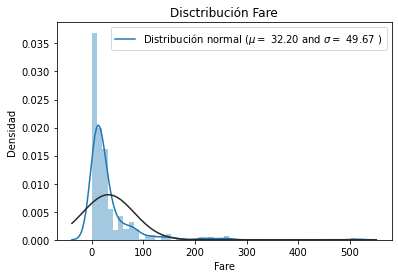

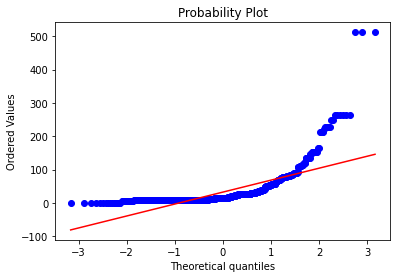

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.distplot(data['Fare'] , fit=stats.norm); 

# Obtener los parámetros ajustados utilizados por la función
(mu, sigma) = stats.norm.fit(data['Fare'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Labels
plt.legend(['Distribución normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Densidad')
plt.title('Disctribución Fare')

#Mostramos QQ-plot
fig = plt.figure()
res = stats.probplot(data['Fare'], plot=plt)
plt.show()

EL precio oscila principalmente entre 0 y 50 aprox. Aunque como podemos observar hay bastantes valores fuera de rango. Para arreglar eso vamos a meterlos dentro de un rango fijo.

In [15]:
def outliers(data, column_input):
    
    mean = column_input.mean()
    std = column_input.std()

    upper = mean + std*2
    lower = mean - std*2

    data = data[(column_input < upper) & (column_input > lower)]
    
    return data

for col in ['Fare']:
    data = outliers(data, data[col])

In [16]:
data['Fare'].describe()

count    853.000000
mean      24.003770
std       23.838119
min        0.000000
25%        7.895800
50%       13.000000
75%       28.500000
max      120.000000
Name: Fare, dtype: float64

Vamos a implementar una matriz de correlación para ver la correlación entre nuestras variables.

<AxesSubplot:>

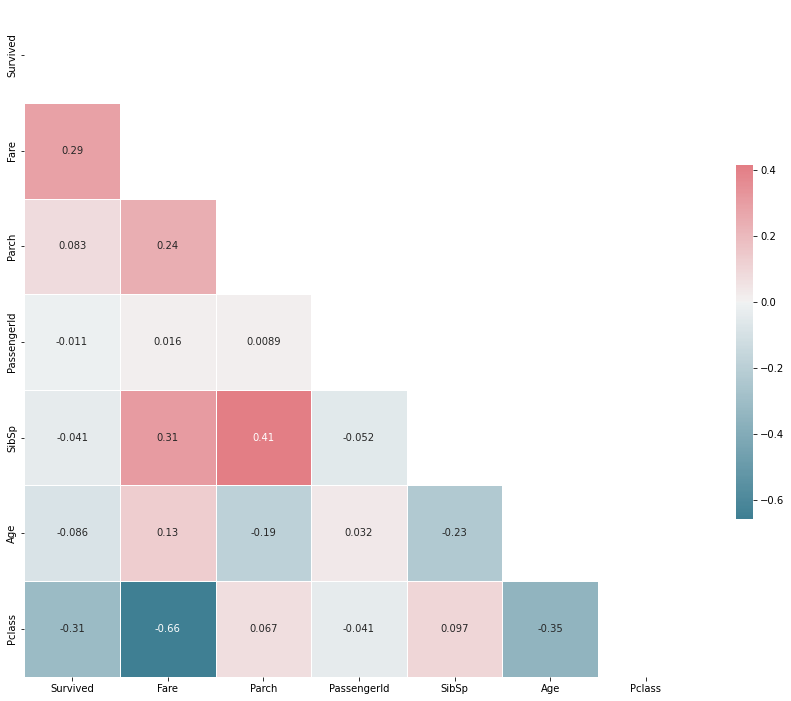

In [17]:
corr = data.corr(method = 'pearson').sort_values(by = 'Survived', axis = 0, ascending = False).sort_values(by = 'Survived', axis = 1, ascending = False)
# Generar una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))
 
# Configurar la figura matplotlib
f, ax = plt.subplots(figsize=(15,13))
 
# Generar un mapa de colores divergente personalizado
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
# Dibujar el mapa de calor con la máscara y la relación de aspecto correcta
sns.heatmap(corr.iloc[0:11,0:11], mask=mask[0:11,0:11], cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

Parece que no hay mucha correlación en general, aunque Fare y Pclass si parecen tener(lo cuál tiene bastante sentido).

Vamos a ver que relación hay entre las variables de forma gráfica.


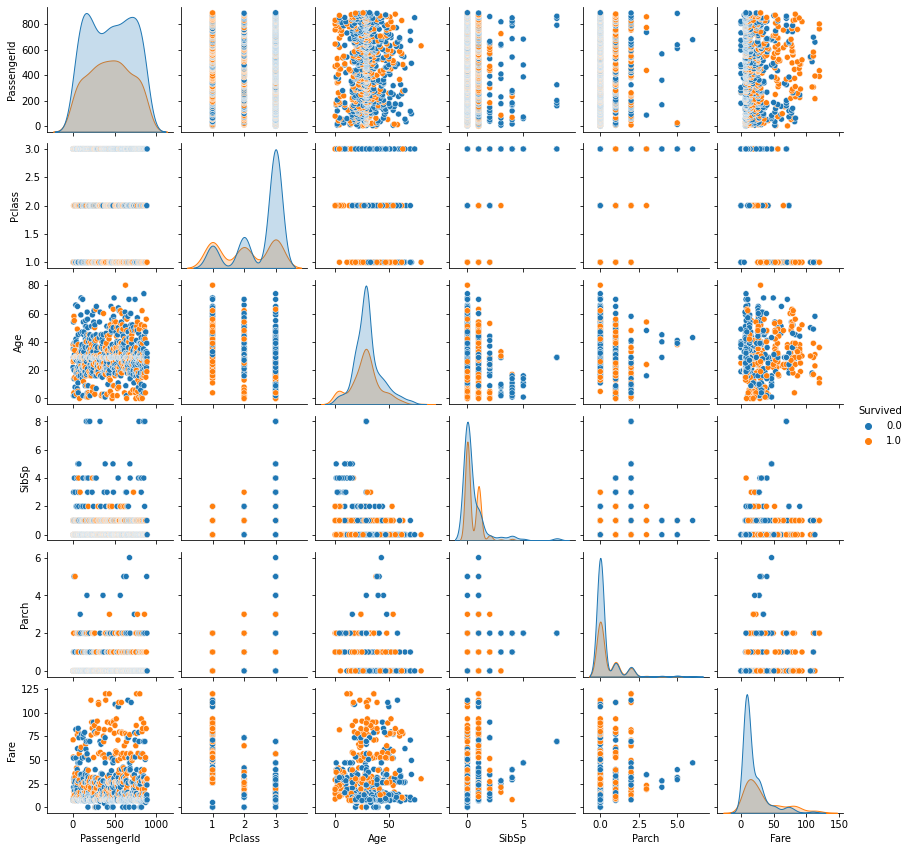

In [18]:
sns.pairplot(hue='Survived', data=data, height=2)
plt.show()

Para hacernos una idea de la cantidad de supervivientes, lo representaremos también mediante una gráfica con contador.

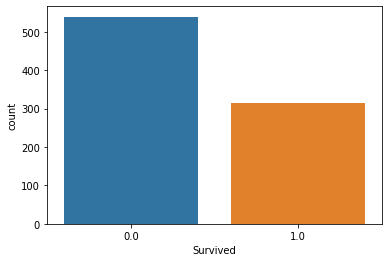

In [19]:
sns.countplot(x=data.Survived)
plt.show()

Vamos a intentar predecir la supervivencia. Para ello vamos a definir las partes de entrenamiento y de test.

In [20]:
data = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

Veamos la cantidad de datos únicos que hay en cada variable por si tenemos que hacer algún cambio para optimizar el proceso.

In [21]:
data_test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [22]:
data.nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [23]:
# Vamos a quitar las columnas de identificación salvo la ID en test, para que la predicción no se vea afectada.
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data_test = data_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)
# Y rellenamos los valores faltantes de nuevo como antes pero teniendo el cuenta los dos csv's.
data.Age = data.Age.fillna(data.Age.mean())
data_test.Age = data_test.Age.fillna(data_test.Age.mean())
data.Embarked = data.Embarked.fillna(data.Embarked.mode()[0])
data_test.Fare = data_test.Fare.fillna(data_test.Fare.mean())

Vamos a dividir las edades en grupos para que sea más eficiente la predicción

In [24]:
labels = ['menor', 'joven', 'adulto', 'mayor']
bins = [0, 17, 30, 60, np.inf] 
data.Age = pd.cut(data.Age, bins=bins, labels=labels)
data_test.Age = pd.cut(data_test.Age, bins=bins, labels=labels)

In [25]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,joven,1,0,7.2500,S
1,1,1,female,adulto,1,0,71.2833,C
2,1,3,female,joven,0,0,7.9250,S
3,1,1,female,adulto,1,0,53.1000,S
4,0,3,male,adulto,0,0,8.0500,S


Vamos a juntar las columnas SibSp y Parch en una llamada Family, ya que ambas representan personas emparentadas abordo.

In [26]:
data['Family'] = data['SibSp'] + data['Parch']
data = data.drop(['SibSp', 'Parch'], axis=1)
data


,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,joven,7.2500,S,1
1,1,1,female,adulto,71.2833,C,1
2,1,3,female,joven,7.9250,S,0
3,1,1,female,adulto,53.1000,S,1
4,0,3,male,adulto,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,joven,13.0000,S,0
887,1,1,female,joven,30.0000,S,0
888,0,3,female,joven,23.4500,S,3
889,1,1,male,joven,30.0000,C,0


Ahora vamos a transformar las columnas tipo objeto a numéricas para poder hacer la predicción y vamos a escalar Fare entre -1 y 1.

In [27]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

for col in ['Sex', 'Age', 'Embarked']:
    data[col] = LabelEncoder().fit_transform(data[col])
    data_test[col] = LabelEncoder().fit_transform(data_test[col])
    
data.Fare = MinMaxScaler().fit_transform(data.Fare.values.reshape(-1,1)) 
data_test.Fare = MinMaxScaler().fit_transform(data_test.Fare.values.reshape(-1,1))
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,1,0.014151,2,1
1,1,1,0,0,0.139136,0,1
2,1,3,0,1,0.015469,2,0
3,1,1,0,0,0.103644,2,1
4,0,3,1,0,0.015713,2,0


Usamos Smote para distribuir proporcionalmente los supervivientes.

In [28]:
%pip install SMOTE
%pip install imblearn
from imblearn.over_sampling import SMOTE

In [29]:
print('Original class distribution:')
print(data.Survived.value_counts())

cols = data.columns
X = data.drop(['Survived'],axis=1)
y = data.Survived

smote = SMOTE()
X, y = smote.fit_resample(X, y)

data = pd.DataFrame(X, columns=cols)
data.Survived = y

print('\nClass distribution after applying a SMOTE Technique:',)
print(y.value_counts())

Original class distribution:
0    549
1    342
Name: Survived, dtype: int64

Class distribution after applying a SMOTE Technique:
0    549
1    549
Name: Survived, dtype: int64


Importamos los modelos de predicción

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Hacemos un diccionario con los procedimientos y mostramos los resultados de cada uno.

In [31]:
classifiers = {'LinearRegression':LinearRegression(), 'DecisionTreeClassifier':DecisionTreeClassifier(),
          'RandomForestClassifier':RandomForestClassifier(),'GradientBoostingClassifier':GradientBoostingClassifier(), 'KNeighborsClassifier':KNeighborsClassifier()}

roc_auc_scores = {}
for idx, clf in enumerate(list(classifiers.values())):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)
    model = clf
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc_scores[list(classifiers.keys())[idx]] = metrics.roc_auc_score(y_test, y_pred)

In [32]:
pd.DataFrame.from_dict(roc_auc_scores, orient='index',columns=['Scores'])

,Scores
LinearRegression,0.856027
DecisionTreeClassifier,0.826554
RandomForestClassifier,0.831515
GradientBoostingClassifier,0.813327
KNeighborsClassifier,0.818122
